# the classification of iris flowers

In [41]:
#importing the libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
#loding the data 
#data that i used in this project can be found on https://www.kaggle.com/uciml/iris/downloads/Iris.csv/data
df=pd.read_csv("Iris.csv")

In [43]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df=df.drop(['Id'],axis=1)

In [45]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [46]:
#using describe function on continuous variable
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
#to see the no. of instaces of different species
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


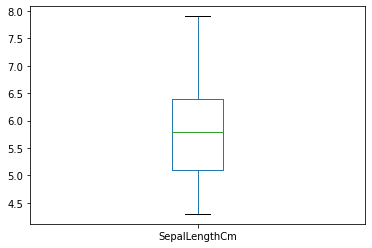

In [48]:
#using boxplot for univariate outliers for SepalLengthCm
df['SepalLengthCm'].plot.box()

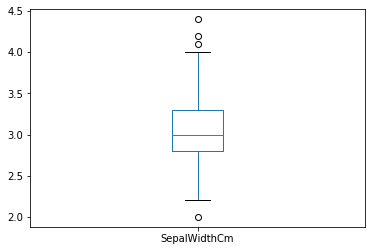

In [49]:
#using boxplot for univariate outliers for SepalWidthCm
df['SepalWidthCm'].plot.box()

In [50]:
#as we see above there are some outliers  so we have to replacing it with mean value of SepalWidthCm
df.loc[df['SepalWidthCm']>4,'SepalWidthCm']=np.mean(df['SepalWidthCm'])

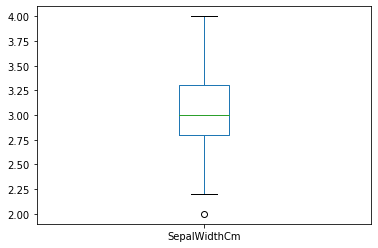

In [51]:
#Again using boxplot for varification on SepalWidthCm
df['SepalWidthCm'].plot.box()

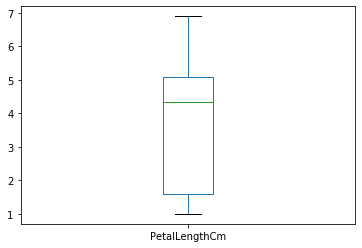

In [52]:
#using boxplot for univariate outliers for PetalLengthCm
df['PetalLengthCm'].plot.box()

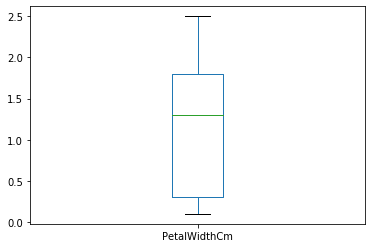

In [53]:
#using boxplot for univariate outliers for PetalWidthCm
df['PetalWidthCm'].plot.box()

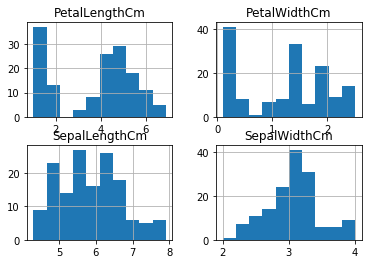

In [54]:
# histograms of dataset
df.hist()
plt.show()

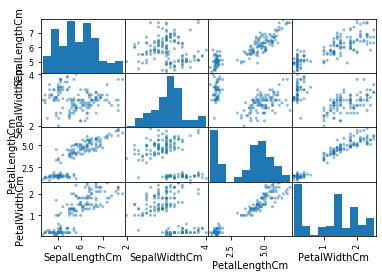

In [55]:
# scatter plot matrix for multivariate to show relationship between different input variables
scatter_matrix(df)
plt.show()

In [56]:
# Split-out test dataset
train=df[0:120]
test=df[121:]
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
#drop the target variable from training data
x_train=train.drop('Species',axis=1)
y_train=train['Species']

In [58]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
#from the testing data and assigning the target variable to ytest for verification
x_test=test.drop('Species',axis=1)
y_test=test['Species']

In [60]:
#test data
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
121,5.6,2.8,4.9,2.0
122,7.7,2.8,6.7,2.0
123,6.3,2.7,4.9,1.8
124,6.7,3.3,5.7,2.1
125,7.2,3.2,6.0,1.8


In [61]:
y_test.head()

121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
Name: Species, dtype: object

In [62]:
#training with LogisticRegression model by making an object of this model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear', multi_class='ovr')

In [63]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predoflogreg=logreg.predict(x_test)
predoflogreg

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [65]:
#checking accuracy of logistic regression on testing data
logreg.score(x_test,y_test)

0.41379310344827586

In [66]:
#checking accuracy of logistic regression on training data
logreg.score(x_train,y_train)

0.9166666666666666

In [67]:
#now fit the data into K-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
predofknclassifier=knclassifier.predict(x_test)
predofknclassifier

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [69]:
#checking accuracy of K-Neighbour classifier on testing data
knclassifier.score(x_test,y_test)

0.7931034482758621

In [70]:
#checking accuracy of K-Neighbour classifier on training data
knclassifier.score(x_train,y_train)

0.9833333333333333

In [71]:
#as we can see that the score of test data is low thi is because of dataset we used in traing is not mixed so we have to randomize it
#shuffling the rows for better training and testing with reindexing
df = df.sample(frac=1).reset_index(drop=True)

In [72]:
#and again we train the model
# Split-out test dataset
train=df[0:120]
test=df[121:]
#drop the target variable from training data
x_train=train.drop('Species',axis=1)
y_train=train['Species']
#training with LogisticRegression model by making an object of this model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear', multi_class='ovr')
logreg.fit(x_train,y_train)
predoflogreg=logreg.predict(x_test)
#checking accuracy of logistic regression on training data
logreg.score(x_train,y_train)

0.975

In [73]:
#checking accuracy of logistic regression on testing data
logreg.score(x_test,y_test)

1.0

In [74]:
#now fit the data into K-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(x_train,y_train)
predofknclassifier=knclassifier.predict(x_test)
#checking accuracy of K-Neighbour classifier on testing data
knclassifier.score(x_test,y_test)

1.0

In [75]:
#checking accuracy of K-Neighbour classifier on training data
knclassifier.score(x_train,y_train)

0.9833333333333333

In [76]:
#and just like these we can use different models to train and predict